In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [19]:
df[df.target==0].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [22]:
df["flower_name"] = df.target.apply(lambda x:iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
df0= df[df.target==0]
df1= df[df.target==1]
df2= df[df.target==2]

In [25]:
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


Text(0, 0.5, 'Sepal Width (cm)')

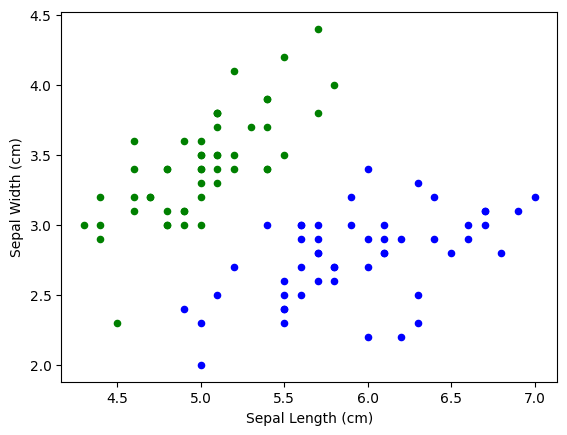

In [35]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],c='green', s=20);
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],c='blue', s=20);
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

Text(0, 0.5, 'Petal Width (cm)')

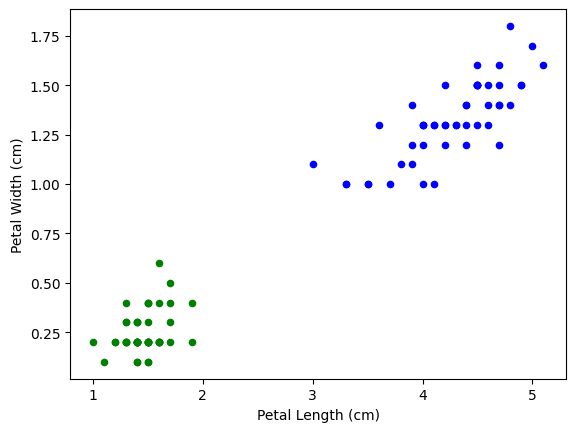

In [36]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],c='green', s=20);
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],c='blue', s=20);
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

In [40]:
from sklearn.model_selection import train_test_split

In [43]:
X = df.drop(['target', 'flower_name'], axis='columns')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [46]:
y = df.target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [60]:
print(len(X_train),len(X_test))

120 30


In [106]:
from sklearn.svm import SVC
model = SVC(kernel='linear')

In [107]:
model.fit(X_train, y_train)

SVC(kernel='linear')

In [108]:
model.score(X_test,y_test)

1.0

In [121]:
y_predicted = model.predict(X_test)
y_predicted

array([1, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 0, 2, 0, 1, 0, 0,
       0, 1, 1, 2, 2, 0, 2, 0])

In [122]:
y_test

52     1
60     1
74     1
2      0
123    2
13     0
56     1
90     1
99     1
96     1
89     1
18     0
66     1
77     1
109    2
110    2
21     0
144    2
17     0
53     1
43     0
29     0
4      0
93     1
69     1
148    2
119    2
10     0
149    2
16     0
Name: target, dtype: int32

In [123]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[10,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  7]], dtype=int64)

Text(20.72222222222222, 0.5, 'Truth')

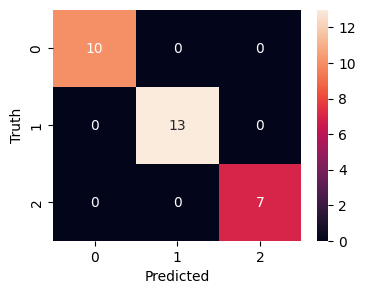

In [124]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(4,3))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')